# Zaawansowana klasyfikacja

## Dane numeryczne - Klasyfikacja za pomocą SVM

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


## Dane tekstowe - Klasyfikacja sentymentu

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

data = ["I love this movie", "This movie is terrible", "Fantastic experience", "Worst ever"]
labels = [1, 0, 1, 0]

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(data, labels)
print(model.predict(["Amazing film"]))

[0]


## Dane obrazowe - Klasyfikacja CIFAR-10

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3900 - loss: 1.6920 - val_accuracy: 0.5504 - val_loss: 1.2944
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5671 - loss: 1.2303 - val_accuracy: 0.5865 - val_loss: 1.2021
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6080 - loss: 1.1138 - val_accuracy: 0.6078 - val_loss: 1.1274
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6426 - loss: 1.0253 - val_accuracy: 0.5969 - val_loss: 1.1440
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6669 - loss: 0.9483 - val_accuracy: 0.6307 - val_loss: 1.0675


## Dane sygnałowe - Klasyfikacja EEG

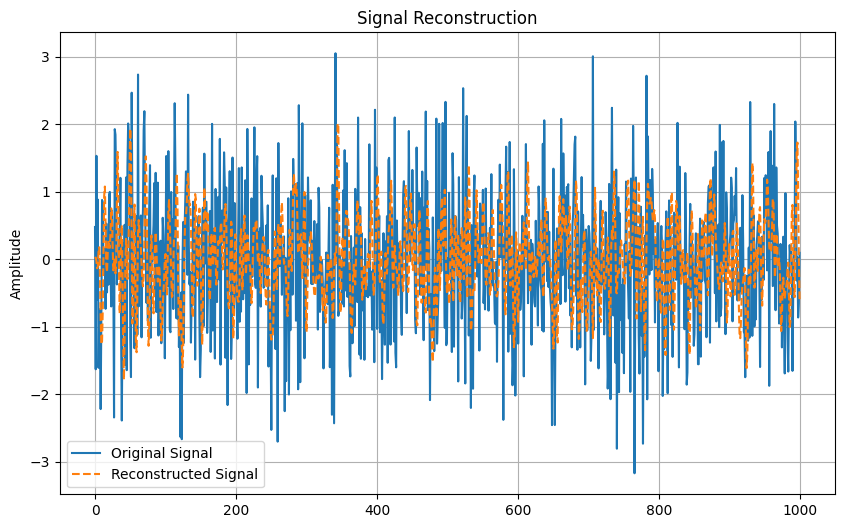

In [4]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as mpl

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

fs = 250  # Czestotliwosc probkowania (Hz)
data = np.random.randn(1000)  # Przykladowy sygnal EEG
filtered_data = butter_bandpass_filter(data, 1, 50, fs)

# Plotting 
mpl.figure(figsize=(10, 6))
mpl.plot(data, label='Original Signal')
mpl.plot(filtered_data, label='Reconstructed Signal', linestyle='--')
mpl.title('Signal Reconstruction')
mpl.ylabel('Amplitude')
mpl.legend()
mpl.grid()
mpl.show()

## Klasyfikacja danych sygnałowych
Dane sygnałowe, takie jak dźwięki czy EEG, wymagają specjalnej obróbki. Poniżej znajduje się przykład przetwarzania i klasyfikacji sygnałów dźwiękowych przy użyciu ekstrakcji cech MFCC oraz modelu opartego na warstwie LSTM.


### Wczytanie i ekstrakcja cech z sygnału dźwiękowego

In [5]:
! pip install librosa

     -------------------------------------- 260.7/260.7 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 64.6/64.6 kB 1.8 MB/s eta 0:00:00
     ------------------------------------- 173.8/173.8 kB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 71.6/71.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 38.1/38.1 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 182.8/182.8 kB 5.6 MB/s eta 0:00:00
     -------------------------------------- 118.1/118.1 kB 7.2 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python311\\Scripts\\numba'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
from sklearn.model_selection import train_test_split

# Wczytanie pliku dzwiekowego
audio, sr = librosa.load("vocal_o.wav", sr=22050)

# Ekstrakcja cech MFCC
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Przygotowanie danych do modelu LSTM
X = np.expand_dims(mfcc.T, axis=0)  # Zmiana wymiarow
Y = np.array([0])  # Etykieta przykladowa

import glob
import librosa
import numpy as np

# Pobranie listy plików .wav
audio_files = glob.glob("*.wav")  

X = []
Y = []

for file in audio_files:
    audio, sr = librosa.load(file, sr=22050)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    # Dzielimy dźwięk na segmenty co 2 sekundy
    for i in range(0, mfcc.shape[1] - 50, 50):  
        X.append(mfcc[:, i:i+50].T)  # Pobranie 50 klatek MFCC
        Y.append(0)  # Przykładowa etykieta

X = np.array(X)
Y = np.array(Y)

C:\Users\Patryk\AppData\Local\Temp\ipykernel_22948\4121247041.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load("vocal_o.wav", sr=22050)
c:\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'vocal_o.wav'

### Klasyfikacja sygnału przy użyciu LSTM

In [ ]:

# Podzial na zbior treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Definiowanie modelu LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6914 - accuracy: 0.6000 - val_loss: 0.6253 - val_accuracy: 0.8000
Epoch 2/10
1/1 [==============================] - 0s 87ms/step - loss: 0.6548 - accuracy: 0.7500 - val_loss: 0.5767 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 74ms/step - loss: 0.5966 - accuracy: 0.8500 - val_loss: 0.5482 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 90ms/step - loss: 0.5699 - accuracy: 0.8500 - val_loss: 0.5114 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 139ms/step - loss: 0.5245 - accuracy: 0.9500 - val_loss: 0.4740 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 65ms/step - loss: 0.4904 - accuracy: 1.0000 - val_loss: 0.4441 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 65ms/step - loss: 0.4513 - accuracy: 1.0000 - val_loss: 0.4166 - val_accuracy: 1.0000
Epoch 8/10
1/1 [============

### Użycie nauczonego modelu do klasyfikacji nowych danych

Po wytrenowaniu modelu można go wykorzystać do klasyfikacji nowych sygnałów dźwiękowych:

In [ ]:
# Wczytanie nowego pliku dzwiekowego
audio_new, sr = librosa.load("vocal_o_8k.wav", sr=22050)

# Ekstrakcja cech MFCC
mfcc_new = librosa.feature.mfcc(y=audio_new, sr=sr, n_mfcc=13)

max_length = 50  # Oczekiwana liczba klatek czasowych

if mfcc_new.shape[1] > max_length:
    mfcc_new = mfcc_new[:, :max_length]  # Obetnij do 50 klatek
X_new = np.expand_dims(mfcc_new.T, axis=0)  # Dopasowanie wymiarow

# Predykcja klasy
prediction = model.predict(X_new)
print("Predykcja klasy sygnalu:", prediction)

1/1 [==============================] - 1s 675ms/step
Predykcja klasy sygnalu: [[0.23613927]]


## Dane wideo - Klasyfikacja akcji

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definiowanie modelu CNN + LSTM
model = models.Sequential([
    # Warstwa konwolucyjna 3D do ekstrakcji cech
    layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=(16, 64, 64, 3)),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
    layers.MaxPooling3D((2, 2, 2)),

    layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
    layers.MaxPooling3D((2, 2, 2)),

    # Spłaszczenie danych do wejścia dla LSTM
    layers.TimeDistributed(layers.Flatten()),

    # Warstwa LSTM do analizy zależności czasowych
    layers.LSTM(128, return_sequences=False),

    # Warstwy w pełni połączone
    layers.Dense(256, activation='relu'),
    layers.Dense(101, activation='softmax')  # 101 klas akcji dla UCF101
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Zapisz model do pliku
model.save('ucf101_action_model.h5')

print("Model CNN + LSTM został poprawnie zapisany!")


Model CNN + LSTM został poprawnie zapisany!


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Wczytaj model wytrenowany na zbiorze UCF101
model = load_model('ucf101_action_model.h5')

# Otwórz plik wideo z UCF101
video_path = 'UCF101_sample_video.mp4'  # Zmień na odpowiednią ścieżkę do pliku wideo
capture = cv2.VideoCapture(video_path)

while capture.isOpened():
    ret, frame = capture.read()
    if not ret:
        break
    
    # Przetwórz ramkę
    frame_resized = cv2.resize(frame, (64, 64)) / 255.0
    frame_expanded = np.expand_dims(frame_resized, axis=0)
    
    # Przewiduj akcję
    prediction = model.predict(frame_expanded)
    print(f'Predykcja: {np.argmax(prediction)}')

capture.release()
cv2.destroyAllWindows()